In [40]:
!gdown 1-5RBLOWWwZG7HThPuBmMqxK9UCXgqjHn

Downloading...
From: https://drive.google.com/uc?id=1-5RBLOWWwZG7HThPuBmMqxK9UCXgqjHn
To: /content/marketing_campaign.csv
100% 218k/218k [00:00<00:00, 95.0MB/s]


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [42]:
data = pd.read_csv('/content/marketing_campaign.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58.0,635.0,...,7.0,0.0,0.0,0.0,0.0,0,0,3.0,11.0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38.0,11.0,...,5.0,0.0,0.0,0.0,0.0,0,0,3.0,11.0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26.0,426.0,...,4.0,0.0,0.0,0.0,0.0,0,0,3.0,11.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26.0,11.0,...,6.0,0.0,0.0,0.0,0.0,0,0,3.0,11.0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94.0,173.0,...,5.0,0.0,0.0,0.0,0.0,0,0,3.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46.0,709.0,...,5.0,0.0,0.0,0.0,0.0,0,0,3.0,11.0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56.0,406.0,...,7.0,0.0,0.0,0.0,1.0,0,0,3.0,11.0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91.0,908.0,...,6.0,0.0,1.0,0.0,0.0,0,0,3.0,11.0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8.0,428.0,...,3.0,0.0,0.0,0.0,0.0,0,0,3.0,11.0,0


In [43]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2161 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2227 non-null   float64
 9   MntWines             2229 non-null   float64
 10  MntFruits            2233 non-null   float64
 11  MntMeatProducts      2216 non-null   float64
 12  MntFishProducts      2209 non-null   float64
 13  MntSweetProducts     2226 non-null   float64
 14  MntGoldProds         2218 non-null   float64
 15  NumDealsPurchases    2229 non-null   f

In [45]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2161.000000,2240.000000,2240.000000,2227.000000,2229.000000,2233.000000,2216.000000,2209.000000,...,2233.000000,2217.000000,2233.000000,2234.000000,2239.000000,2240.000000,2240.000000,2238.0,2237.0,2240.000000
mean,5592.159821,1968.805804,52259.187876,0.444196,0.506250,49.109115,304.501570,26.321541,167.263538,37.269353,...,5.315719,0.073072,0.074787,0.072963,0.064314,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25277.346943,0.538398,0.544538,28.963624,336.982452,39.789495,226.438706,54.591553,...,2.426742,0.260313,0.263107,0.260134,0.245367,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35322.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51315.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68655.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,49.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [46]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 79
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                13
MntWines               11
MntFruits               7
MntMeatProducts        24
MntFishProducts        31
MntSweetProducts       14
MntGoldProds           22
NumDealsPurchases      11
NumWebPurchases        11
NumCatalogPurchases    23
NumStorePurchases      26
NumWebVisitsMonth       7
AcceptedCmp3           23
AcceptedCmp4            7
AcceptedCmp5            6
AcceptedCmp1            1
AcceptedCmp2            0
Complain                0
Z_CostContact           2
Z_Revenue               3
Response                0
dtype: int64

<ipython-input-47-8b80eb2e1266>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


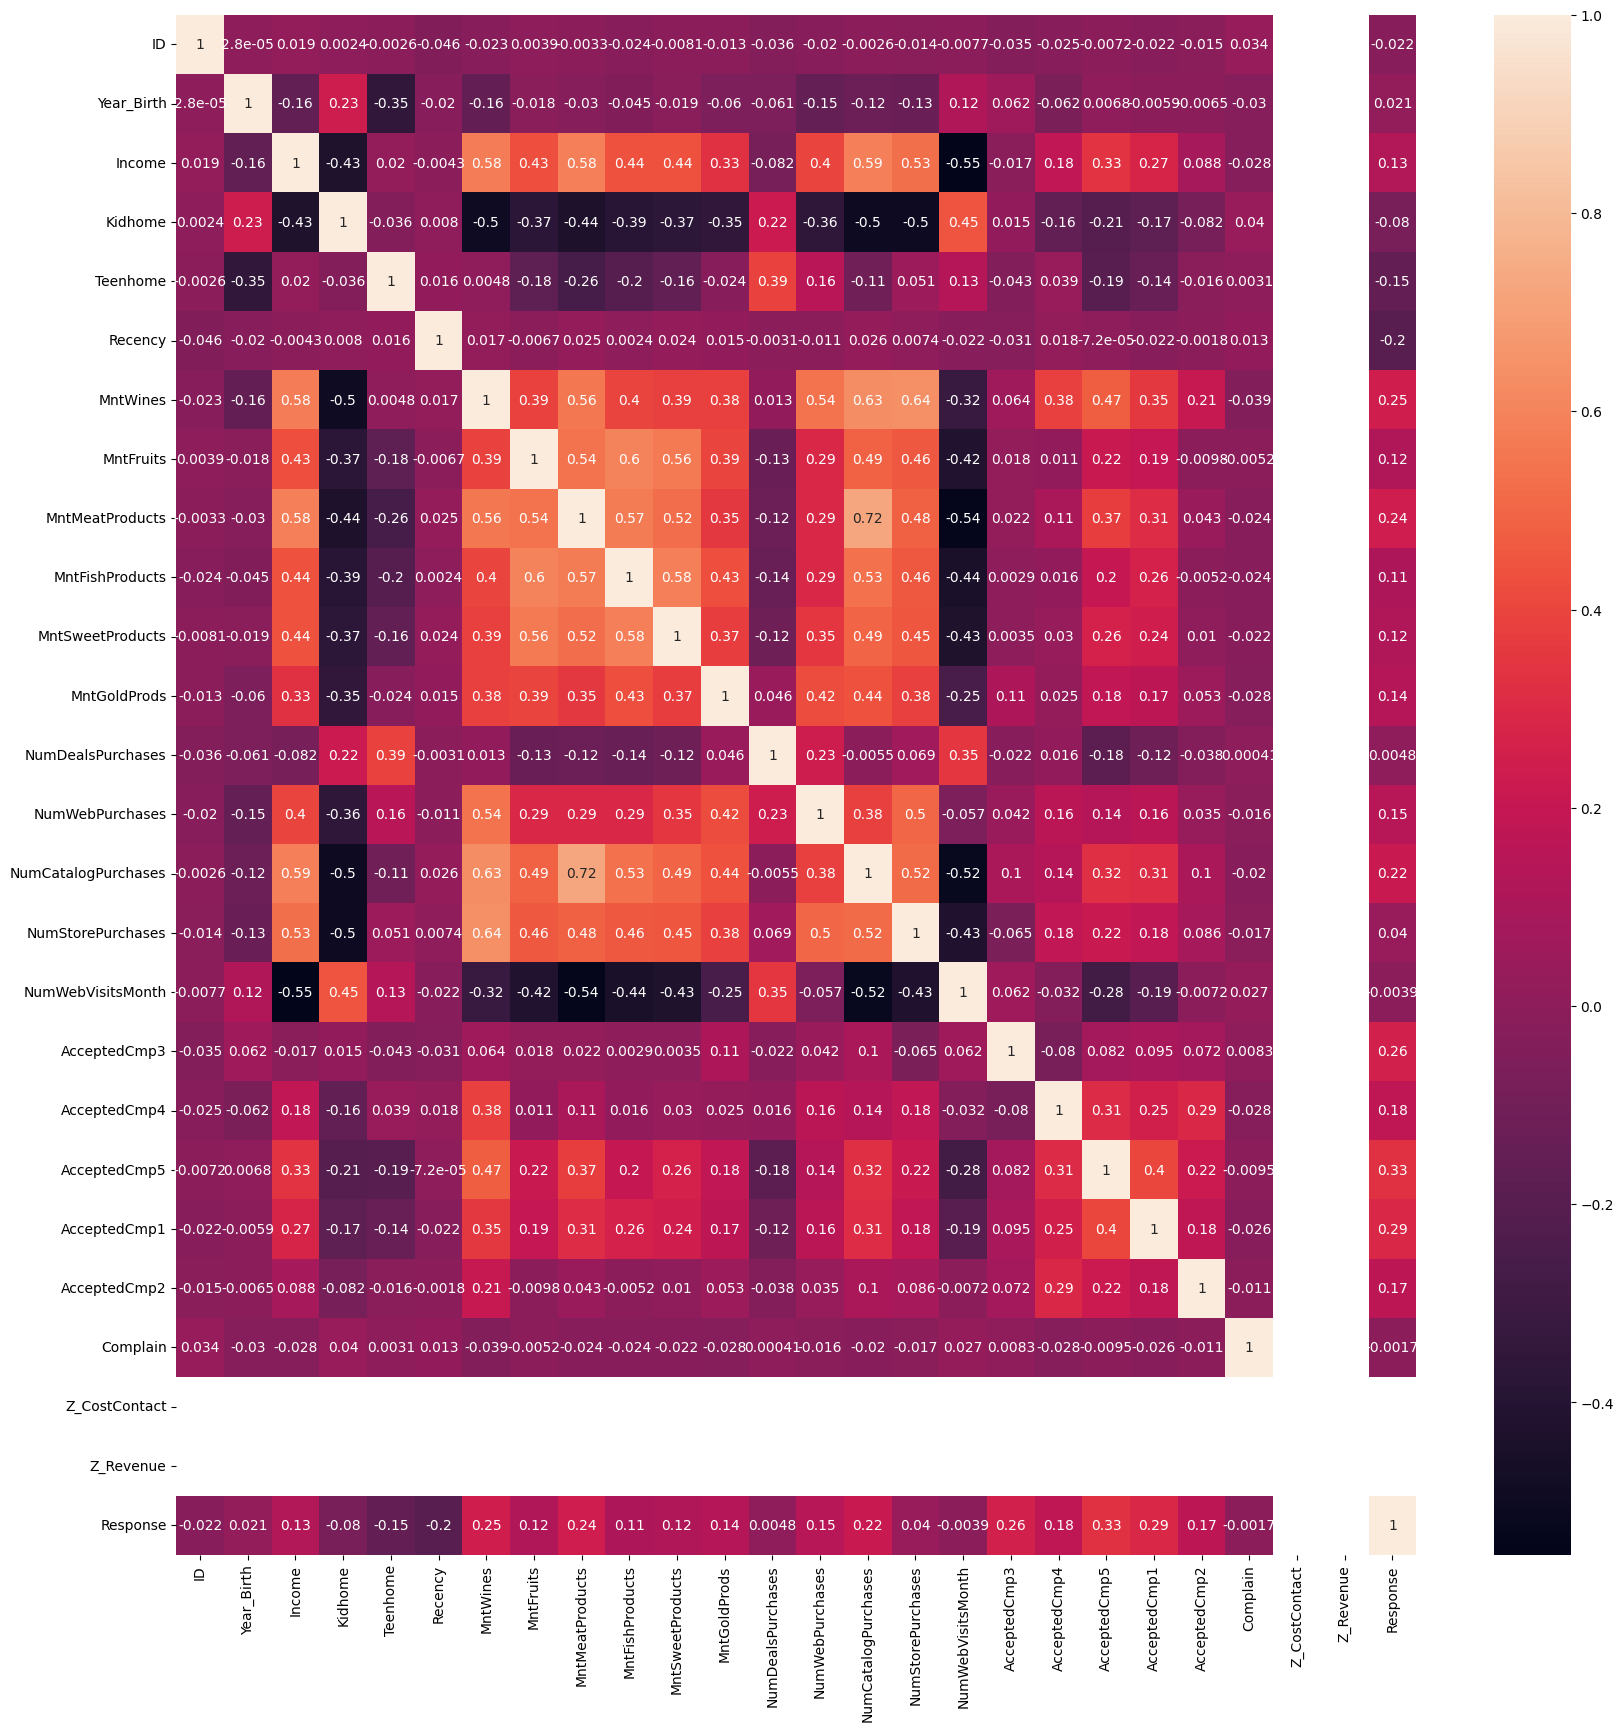

In [47]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

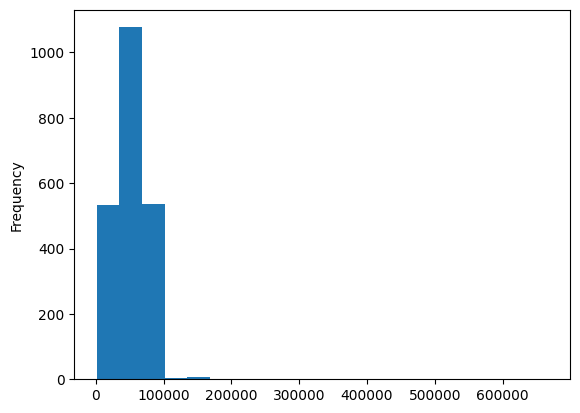

In [48]:
data['Income'].plot.hist(bins=20)
plt.show()

In [49]:
data['Income'] = data['Income'].fillna(value=data['Income'].mean())

In [50]:
data = data.dropna()

In [51]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [52]:
data['Education'].value_counts()

Graduation        1026
PhD                435
Master             336
2n Cycle           181
Basic               49
Master Student       2
Name: Education, dtype: int64

In [53]:
data['Education'] = data['Education'].replace(['2n Cycle', 'Master Student'], 'Master')

<ipython-input-53-dd0d37299cb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education'] = data['Education'].replace(['2n Cycle', 'Master Student'], 'Master')


In [54]:
data['Education'].value_counts()

Graduation    1026
Master         519
PhD            435
Basic           49
Name: Education, dtype: int64

In [55]:
education_encoding = {
    "Basic": 0,
    "Graduation": 1,
    "Master": 2,
    "PhD": 3
}

In [56]:
def encode_education(education):
    return education_encoding[education]

In [57]:
data['Education'] = data['Education'].apply(encode_education)

<ipython-input-57-77241c405afe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education'] = data['Education'].apply(encode_education)


In [58]:
data['Marital_Status'].value_counts()

Married     781
Together    529
Single      434
Divorced    212
Widow        66
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [59]:
data['Marital_Status'].replace(['Alone'], 'Single', inplace=True)

<ipython-input-59-bdfe19a25f05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Marital_Status'].replace(['Alone'], 'Single', inplace=True)


In [60]:
data.drop(data[(data['Marital_Status'] == 'Absurd') | (data['Marital_Status'] == 'YOLO')].index, inplace=True)

<ipython-input-60-650db211aaee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Marital_Status'] == 'Absurd') | (data['Marital_Status'] == 'YOLO')].index, inplace=True)


In [61]:
enc_data = pd.get_dummies(data[['Marital_Status']])
data = pd.concat([data, enc_data], axis=1)

In [62]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,1,Single,58138.0,0,0,4/9/2012,58.0,635.0,...,0,0,3.0,11.0,1,0,0,1,0,0
1,2174,1954,1,Single,46344.0,1,1,8/3/2014,38.0,11.0,...,0,0,3.0,11.0,0,0,0,1,0,0
2,4141,1965,1,Together,71613.0,0,0,21-08-2013,26.0,426.0,...,0,0,3.0,11.0,0,0,0,0,1,0
3,6182,1984,1,Together,26646.0,1,0,10/2/2014,26.0,11.0,...,0,0,3.0,11.0,0,0,0,0,1,0
4,5324,1981,3,Married,58293.0,1,0,19-01-2014,94.0,173.0,...,0,0,3.0,11.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,1,Married,34421.0,1,0,1/7/2013,81.0,3.0,...,0,0,3.0,11.0,0,0,1,0,0,0
2236,4001,1946,3,Together,64014.0,2,1,10/6/2014,56.0,406.0,...,0,0,3.0,11.0,0,0,0,0,1,0
2237,7270,1981,1,Divorced,56981.0,0,0,25-01-2014,91.0,908.0,...,0,0,3.0,11.0,0,1,0,0,0,0
2238,8235,1956,2,Together,69245.0,0,1,24-01-2014,8.0,428.0,...,0,0,3.0,11.0,0,0,0,0,1,0


In [63]:
data = data.drop(columns=['Marital_Status', 'ID'])

In [64]:
data['Kidhome'].value_counts()

0    1157
1     824
2      44
Name: Kidhome, dtype: int64

In [66]:
data.drop(columns=['Dt_Customer'], inplace=True)

In [69]:
features = data[['Year_Birth',
 'Education',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue',]]

In [70]:
scaler = MinMaxScaler()

In [74]:
picked_features = list(features.columns)

In [75]:
data[picked_features] = scaler.fit_transform(data[picked_features])

In [76]:
data

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.621359,0.333333,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316125,0.664093,...,0,0,0.0,0.0,1,0,0,1,0,0
1,0.592233,0.333333,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.002900,0.007722,...,0,0,0.0,0.0,0,0,0,1,0,0
2,0.699029,0.333333,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073086,0.428571,...,0,0,0.0,0.0,0,0,0,0,1,0
3,0.883495,0.333333,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011021,0.038610,...,0,0,0.0,0.0,0,0,0,0,1,0
4,0.854369,1.000000,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.067865,0.177606,...,0,0,0.0,0.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,0.786408,0.333333,0.049164,0.5,0.0,0.818182,0.002009,0.015075,0.003480,0.023166,...,0,0,0.0,0.0,0,0,1,0,0,0
2236,0.514563,1.000000,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.016821,0.000000,...,0,0,0.0,0.0,0,0,0,0,1,0
2237,0.854369,0.333333,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125290,0.123552,...,0,0,0.0,0.0,0,1,0,0,0,0
2238,0.611650,0.666667,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.123550,0.308880,...,0,0,0.0,0.0,0,0,0,0,1,0


In [77]:
X, Y = data.drop(columns=['Response']), data['Response']

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [80]:
knn = KNeighborsClassifier(n_neighbors=3)

In [81]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
Y_pred = knn.predict(X_test)

In [87]:
balanced_data = data.groupby('Response').size()
balanced_data

Response
0    1718
1     307
dtype: int64

In [84]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       347
           1       0.54      0.34      0.42        58

    accuracy                           0.86       405
   macro avg       0.72      0.65      0.67       405
weighted avg       0.85      0.86      0.85       405



In [85]:
print(f1_score(Y_test, Y_pred))

0.4210526315789474


In [90]:
X, Y = data.drop(columns=['Response']), data['Response']

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [92]:
scores = []
for k in range(1, 15):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  preds = knn.predict(X_test)
  sc = f1_score(preds, Y_test)
  scores.append(sc)

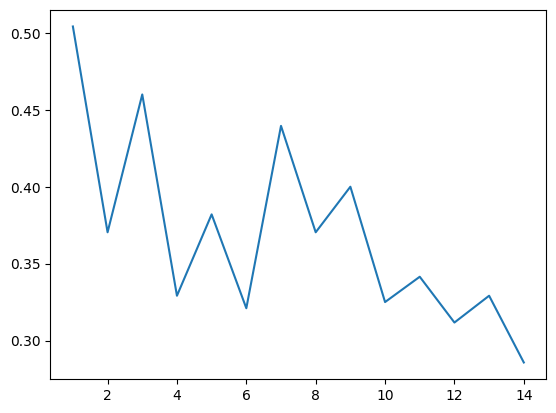

In [93]:
plt.plot(np.arange(1, 15), scores)
plt.show()

In [94]:
knn = KNeighborsClassifier(n_neighbors=1)

In [95]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [96]:
Y_pred = knn.predict(X_test)

In [97]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       342
           1       0.54      0.48      0.50        63

    accuracy                           0.85       405
   macro avg       0.72      0.70      0.71       405
weighted avg       0.85      0.85      0.85       405



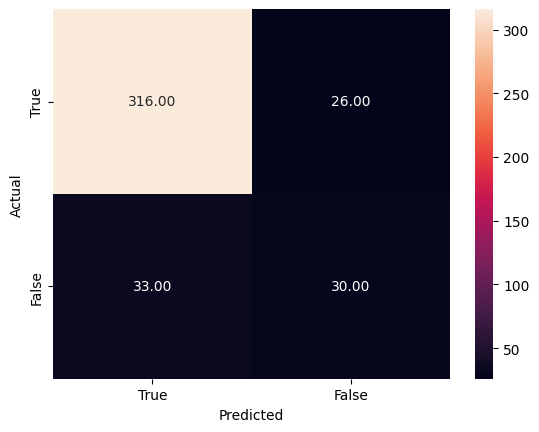

In [99]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='5.2f', xticklabels=["True", "False"], yticklabels=["True", "False"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()